In [1]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [3]:
#drop columns without meaningful variables
kc_housing = kc_housing.drop(columns = ['id','date','sqft_basement','zipcode', 'lat', 'long', 'waterfront', 'yr_renovated'])

In [4]:
#drop .29% of rows with Nan values
kc_housing = kc_housing.dropna()

In [5]:
#check dataframe shape
kc_housing.shape

(21534, 13)

count      21534.000000
mean      540057.663834
std       366059.581231
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

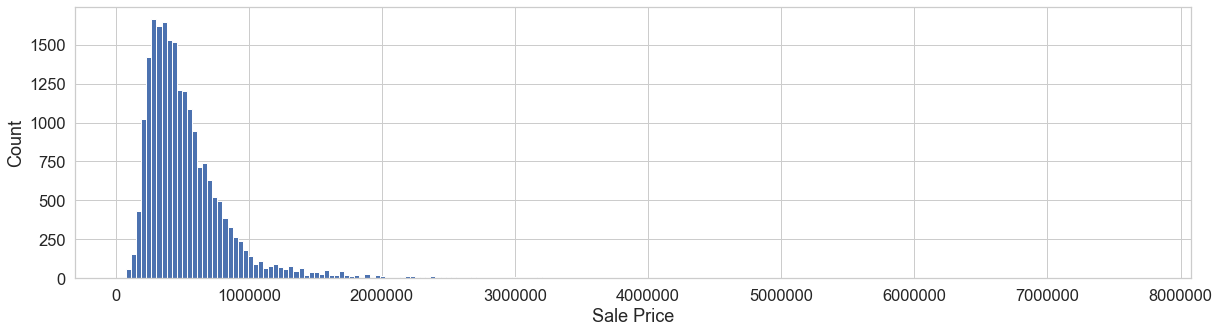

In [6]:
#plot the distribution of price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#distribution is skewed to the right

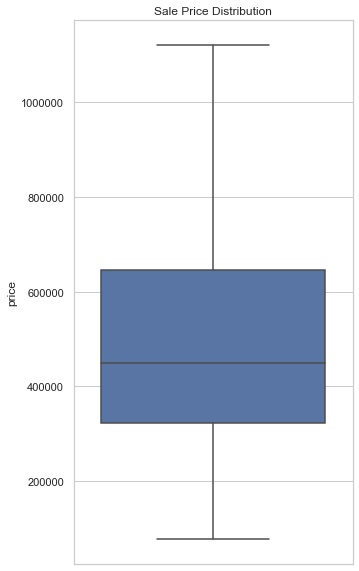

In [7]:
#create a whisker plot without outliers 
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=kc_housing["price"],showfliers=False)
plt.title("Sale Price Distribution")
ax 

[Text(0.5, 0, '')]

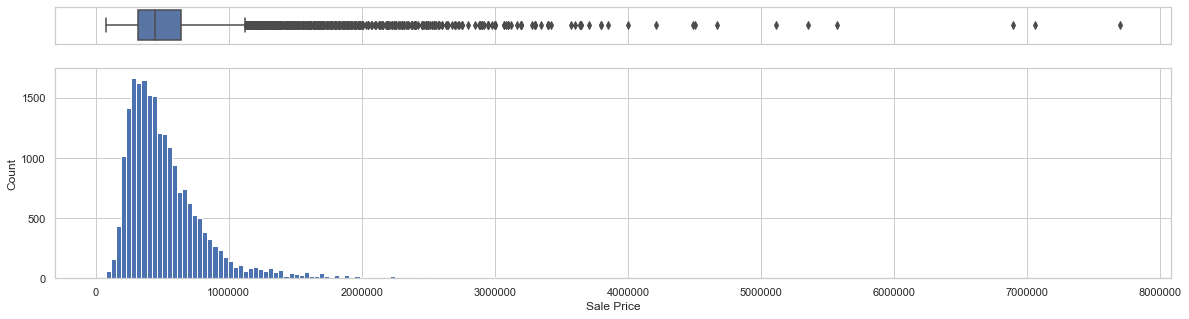

In [8]:
# Create a histogram-boxwhisker of price distribution:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(kc_housing["price"], ax=ax_box)
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

Text(0.5, 1.0, 'Sqft Living Vs Price')

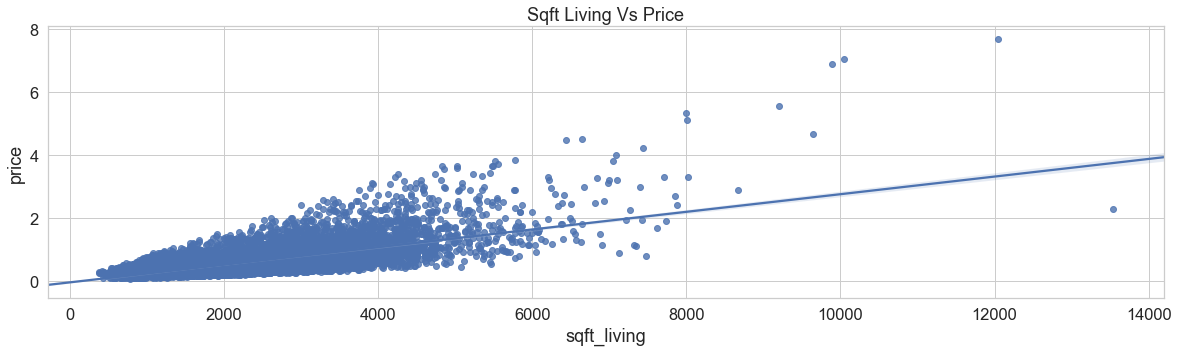

In [9]:
#create a regression plot for sqft living vs price
sqft_living = kc_housing['sqft_living']
price = kc_housing['price']/1000000
sqftliving = pd.DataFrame(kc_housing, columns = ['sqft_living', 'price'])
sns.regplot(x= sqft_living, y=price, data=sqftliving).set_title('Sqft Living Vs Price')

Text(0.5, 1.0, 'House Grade vs Price')

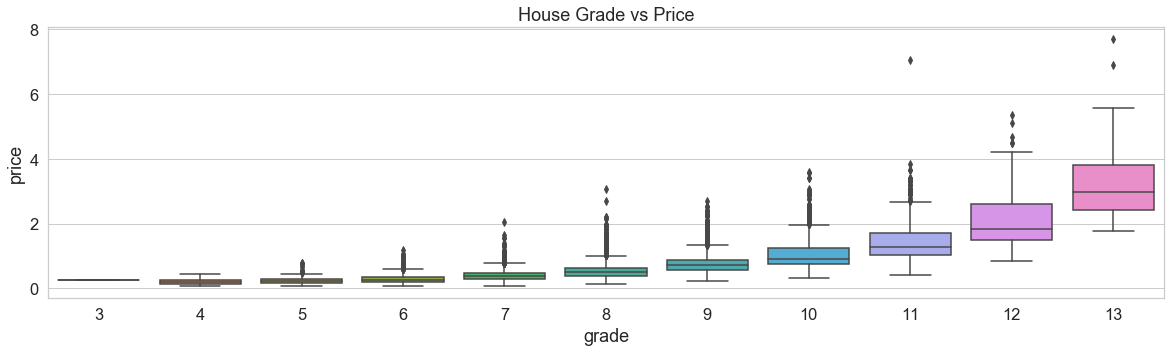

In [10]:
# create a whisker plot for grade vs price
grade = kc_housing['grade']
price= kc_housing['price']/1000000
grade_df = pd.DataFrame(kc_housing, columns = ['grade', 'price'])
sns.boxplot(x= grade, y=price, data=grade_df).set_title('House Grade vs Price')


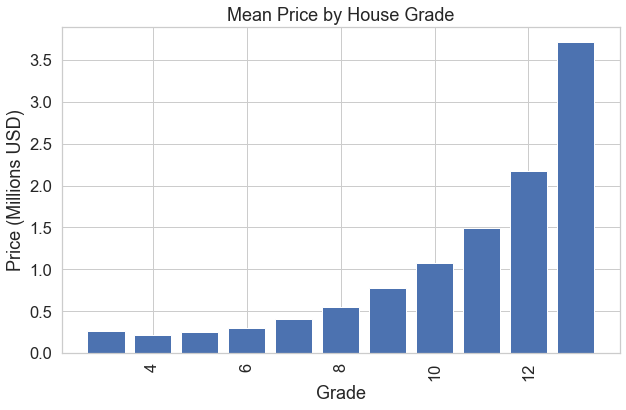

In [11]:
#create a bar graph for graph vs mean price
freq_grade = kc_housing['grade'].value_counts()
freq_grade_list = list(freq_grade.head(13).keys())

main_df_grade = []
for n in freq_grade_list:
    main_df_grade.append(kc_housing.loc[(kc_housing['grade'] == n)])


main_df_grade = pd.concat(main_df_grade)
grade_price = main_df_grade.groupby(kc_housing['grade']).mean()

grade_price = grade_price.sort_values(by='price',ascending=False)
X = grade_price.index
y = grade_price['price']/1000000
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

plt.bar(X,y)

# ax.set_xticks(range(len(x)))
# ax.set_xticklabels(x)
plt.xticks(rotation=90)
plt.title('Mean Price by House Grade')
plt.xlabel('Grade')
plt.ylabel('Price (Millions USD)')
plt.savefig('Bar_Chart')
plt.show()

In [12]:
#remove later
kc_housing.corr()
#corr between sqft_lot and sqft_lot15 is .72, sqft_living15 and sqft_living is .76, sqft_living and grade is .76, sqft_living and bathrooms is 0.75, 


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.395734,0.035393,0.668307,0.605695,0.054273,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.078523,0.026402,0.356095,0.479148,0.155462,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.186451,-0.126682,0.665312,0.686173,0.507565,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.282532,-0.059783,0.762398,0.876553,0.318217,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.075298,-0.008375,0.115122,0.184325,0.052646,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.028436,-0.264138,0.458694,0.523367,0.489410,0.279176,-0.010850
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.045735,0.249727,0.166299,-0.054564,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.045735,1.000000,-0.147326,-0.158830,-0.361398,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.249727,-0.147326,1.000000,0.755977,0.448255,0.713462,0.121435
sqft_above,0.605695,0.479148,0.686173,0.876553,0.184325,0.523367,0.166299,-0.158830,0.755977,1.000000,0.423999,0.731543,0.195413


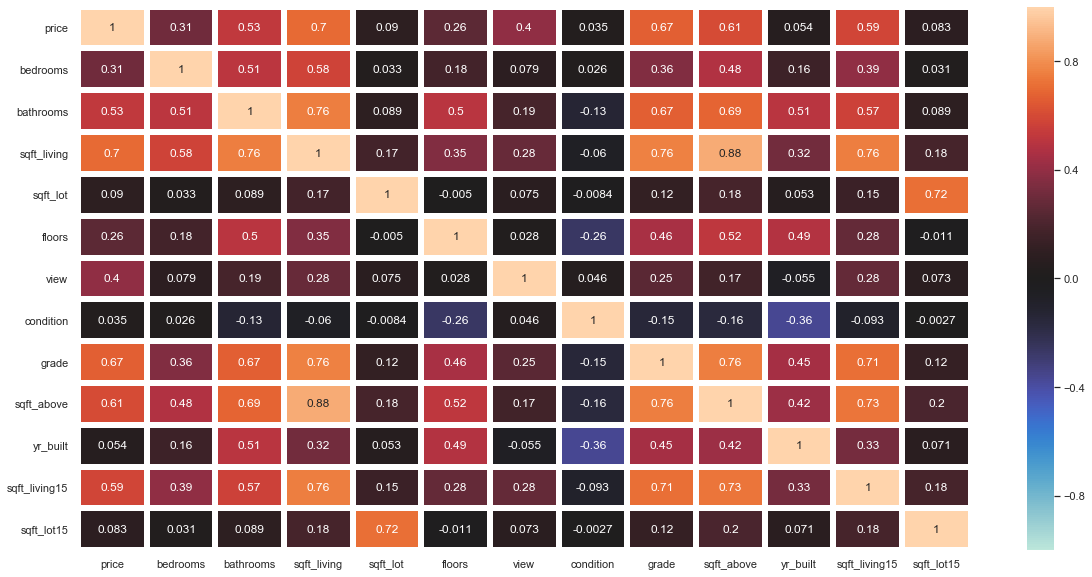

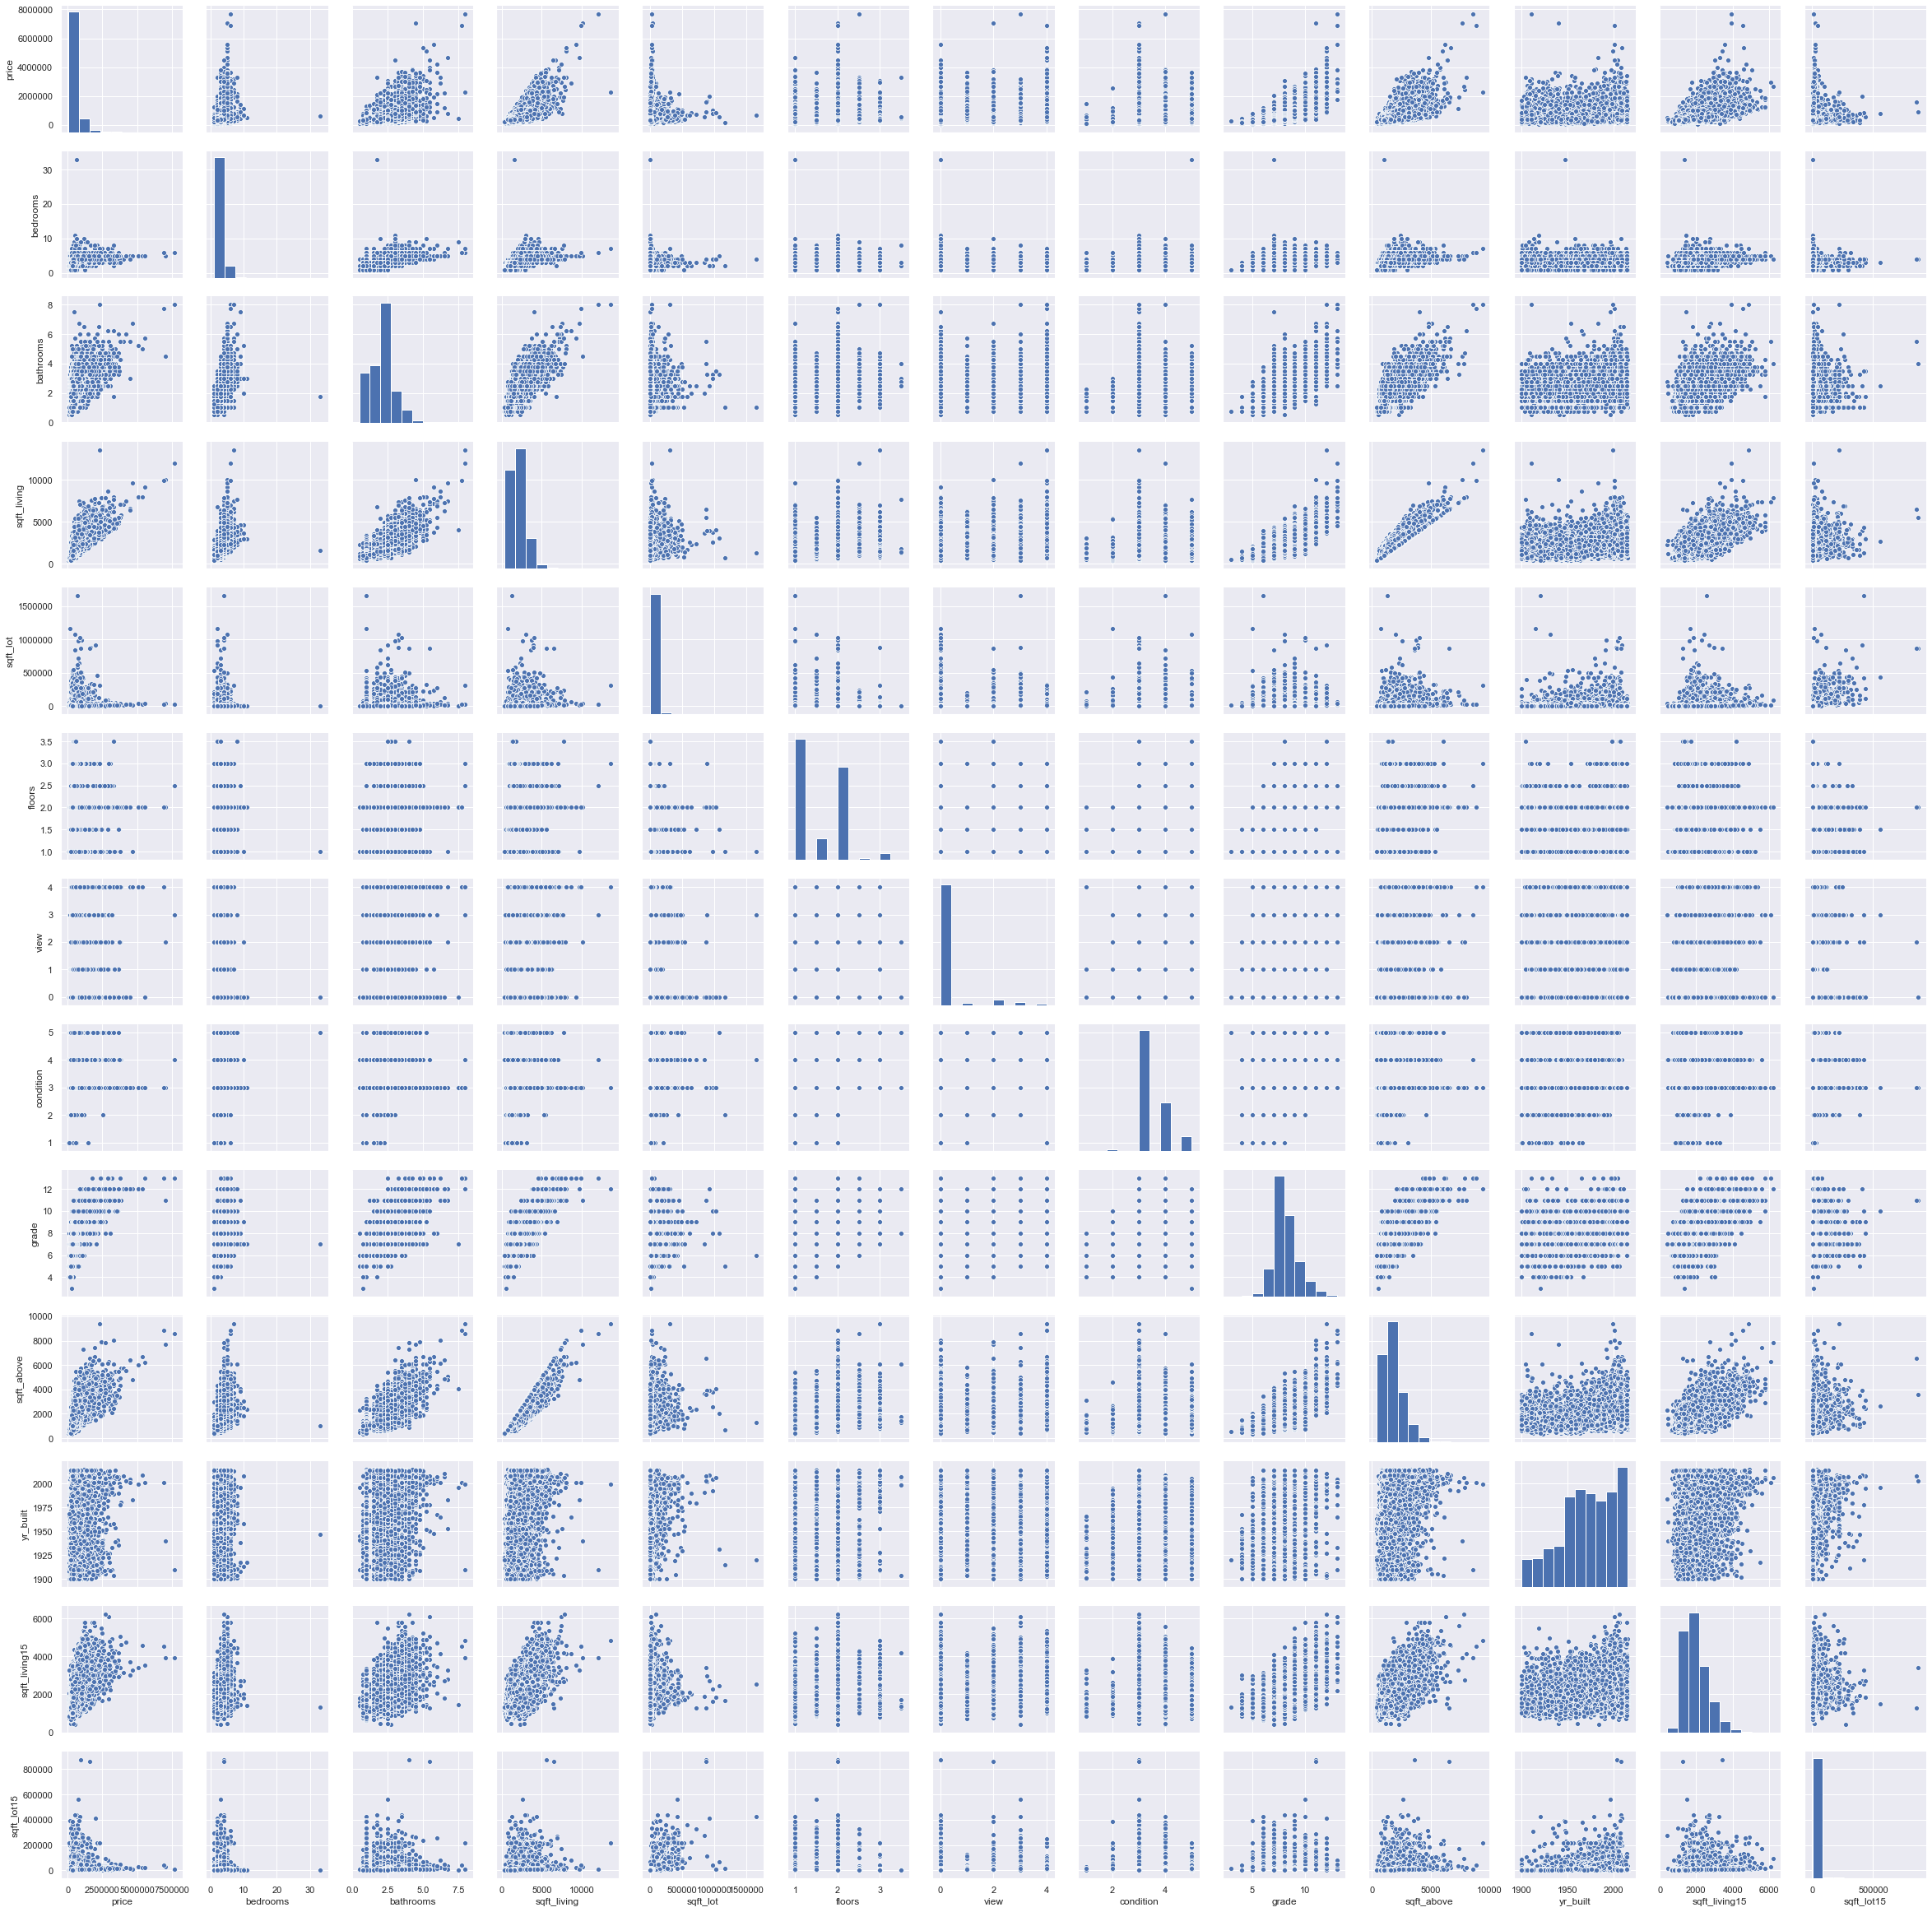

In [13]:
#create heatmap and pairplots
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [14]:
# use statsmodel to assess multivariables 
# Define variables:
# X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view','condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']].values
# Removed sqft_lot, sqft_above due to high p_values        
X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view','condition', 'grade', 'yr_built', 'sqft_living15','sqft_lot15']].values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3802.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:46:08   Log-Likelihood:            -2.9546e+05
No. Observations:               21534   AIC:                         5.909e+05
Df Residuals:                   21523   BIC:                         5.910e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.339e+06   1.33e+05     47.708      0.000    6.08e+06     6.6e+06
x1         -4.217e+04   2073.142    -20.340      0.000   -4.62e+04   -3.81e+04
x2          4.689e+04   3497.773     13.406      0.000       4e+04    5.37e+04
x3           165.6624      3.656     45.315      0.000     158.497     172.828
x4          2.764e+04   3504.640      7.886      0.000    2.08e+04    3.45e+04
x5          7.013e+04   2107.846     33.270      0.000     6.6e+04    7.43e+04
x6          1.905e+04   2508.178      7.597      0.000    1.41e+04     2.4e+04
x7          1.195e+05   2291.576     52.154      0.000    1.15e+05    1.24e+05
x8         -3638.2022     68.444    -53.156      0.000   -3772.357   -3504.047
x9            20.2553      3.597      5.631      0.000      13.205      27.306
x10           -0.5651      0.057     -9.951      0.000      -0.676      -0.454
==============================================================================
Omnibus:                    16958.168   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1276274.220
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      40.157   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#drop columns that were not statistically significnt in our model
kc_housing = kc_housing.drop(columns = ['sqft_lot', 'sqft_above'])

In [16]:
#transform categorical data into numbers
# Define the problem
y = 'price'

# Note that we excluded price from x_cols.
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view','condition', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15']
#Define categorical variables
categorical_variables = ['condition', 'grade', 'view', 'bedrooms', 'bathrooms', 'floors']

In [17]:
#create dummies for categorical variables
df_ohe = pd.get_dummies(kc_housing[x_cols], columns= categorical_variables, drop_first =True)
print(df_ohe.shape)
df_ohe.head(15)

(21534, 66)


,sqft_living,yr_built,sqft_living15,sqft_lot15,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,1180,1955,1340,5650,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,1951,1690,7639,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,770,1933,2720,8062,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,1965,1360,5000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,1987,1800,7503,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5420,2001,4760,101930,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1715,1995,2238,6819,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1780,1960,1780,8113,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1890,2003,2390,7570,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,3560,1965,2210,8925,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


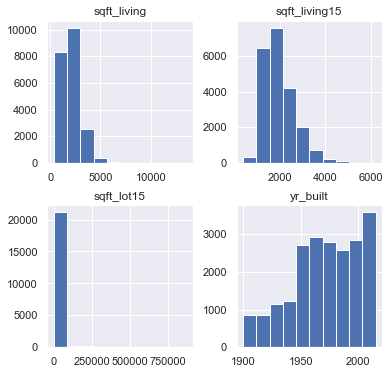

In [18]:
#remove if we do not scale
df_ohe[['sqft_living','yr_built', 'sqft_living15','sqft_lot15']].hist(figsize  = [6, 6]); 

In [19]:
#print a model summary for our new dataframe df_ohe
X = df_ohe.values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     714.5
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:46:09   Log-Likelihood:            -2.9390e+05
No. Observations:               21534   AIC:                         5.879e+05
Df Residuals:                   21467   BIC:                         5.885e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.826e+06   2.72e+05     21.394      0.000    5.29e+06    6.36e+06
x1           123.4888      3.607     34.233      0.000     116.418     130.560
x2         -3065.0920     72.740    -42.137      0.000   -3207.668   -2922.516
x3            41.1880      3.490     11.802      0.000      34.347      48.028
x4            -0.5961      0.053    -11.172      0.000      -0.701      -0.492
x5          2.803e+04   4.14e+04      0.678      0.498    -5.3e+04    1.09e+05
x6          5.527e+04   3.85e+04      1.437      0.151   -2.01e+04    1.31e+05
x7          7.091e+04   3.85e+04      1.842      0.065   -4527.341    1.46e+05
x8          1.167e+05   3.87e+04      3.015      0.003    4.08e+04    1.93e+05
x9          2.111e+04   2.09e+05      0.101      0.920   -3.89e+05    4.32e+05
x10         2.815e+04   2.07e+05      0.136      0.892   -3.78e+05    4.34e+05
x11         8.049e+04   2.07e+05      0.389      0.697   -3.25e+05    4.86e+05
x12         1.744e+05   2.07e+05      0.842      0.400   -2.31e+05     5.8e+05
x13         2.647e+05   2.07e+05      1.278      0.201   -1.41e+05    6.71e+05
x14         3.992e+05   2.07e+05      1.927      0.054   -6923.023    8.05e+05
x15         5.554e+05   2.07e+05      2.680      0.007    1.49e+05    9.62e+05
x16         7.726e+05   2.08e+05      3.722      0.000    3.66e+05    1.18e+06
x17          1.15e+06   2.09e+05      5.508      0.000     7.4e+05    1.56e+06
x18         1.914e+06   2.17e+05      8.809      0.000    1.49e+06    2.34e+06
x19         1.152e+05   1.15e+04      9.997      0.000    9.26e+04    1.38e+05
x20         5.225e+04   6984.439      7.480      0.000    3.86e+04    6.59e+04
x21         1.171e+05   9507.974     12.321      0.000    9.85e+04    1.36e+05
x22         4.403e+05    1.2e+04     36.551      0.000    4.17e+05    4.64e+05
x23         1.217e+04   1.58e+04      0.772      0.440   -1.87e+04    4.31e+04
x24        -3.035e+04   1.58e+04     -1.924      0.054   -6.13e+04     565.946
x25        -6.094e+04   1.61e+04     -3.784      0.000   -9.25e+04   -2.94e+04
x26        -5.842e+04    1.7e+04     -3.443      0.001   -9.17e+04   -2.52e+04
x27        -1.296e+05   2.07e+04     -6.256      0.000    -1.7e+05    -8.9e+04
x28        -2.305e+05    3.8e+04     -6.070      0.000   -3.05e+05   -1.56e+05
x29         3.475e+04   6.03e+04      0.577      0.564   -8.34e+04    1.53e+05
x30        -1.927e+05    9.4e+04     -2.050      0.040   -3.77e+05   -8469.508
x31        -1.856e+05   1.21e+05     -1.531      0.126   -4.23e+05     5.2e+04
x32        -2.598e+05   2.06e+05     -1.262      0.207   -6.63e+05    1.44e+05
x33         1.356e+05   2.06e+05      0.659      0.510   -2.68e+05    5.39e+05
x34         9.171e+04   1.06e+05      0.867      0.386   -1.16e+05    2.99e+05
x35         8.705e+04   1.03e+05      0.848      0.397   -1.14e+05    2.88e+05
x3

In [20]:
#remove const 
list_of_const = [5,6,7,9,10,11,12,13,14,23,24,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,57,59]
iteration = 0
cleaned_column_list = []
for x in list(df_ohe.columns):
    iteration += 1
    for num in list_of_const:
        if(iteration == num):
            cleaned_column_list.append(x)

In [21]:
cleaned_column_list

['condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_8',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bathrooms_0.75',
 'bathrooms_1.0',
 'bathrooms_1.25',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.5',
 'bathrooms_6.5',
 'bathrooms_7.5']

In [22]:
df_ohe = df_ohe.drop(columns = cleaned_column_list)

In [23]:
X = df_ohe.values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1085.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:46:09   Log-Likelihood:            -2.9489e+05
No. Observations:               21534   AIC:                         5.899e+05
Df Residuals:                   21495   BIC:                         5.902e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.033e+06   1.33e+05     37.896      0.000    4.77e+06    5.29e+06
x1           177.9756      3.220     55.270      0.000     171.664     184.287
x2         -2570.4961     68.197    -37.692      0.000   -2704.167   -2436.825
x3            76.0110      3.477     21.861      0.000      69.196      82.826
x4            -0.7078      0.055    -12.756      0.000      -0.817      -0.599
x5          5.597e+04   5624.352      9.952      0.000     4.5e+04     6.7e+04
x6          2.046e+05   7488.314     27.320      0.000     1.9e+05    2.19e+05
x7          3.707e+05   1.25e+04     29.741      0.000    3.46e+05    3.95e+05
x8          6.969e+05   2.52e+04     27.661      0.000    6.47e+05    7.46e+05
x9          1.422e+06    6.8e+04     20.909      0.000    1.29e+06    1.56e+06
x10          1.31e+05    1.2e+04     10.885      0.000    1.07e+05    1.55e+05
x11         7.141e+04   7279.470      9.810      0.000    5.71e+04    8.57e+04
x12         1.397e+05   9919.326     14.086      0.000     1.2e+05    1.59e+05
x13         4.594e+05   1.26e+04     36.562      0.000    4.35e+05    4.84e+05
x14        -3.933e+04   3744.164    -10.505      0.000   -4.67e+04    -3.2e+04
x15        -4.546e+04   6429.703     -7.070      0.000   -5.81e+04   -3.29e+04
x16        -1.266e+05   1.39e+04     -9.102      0.000   -1.54e+05   -9.94e+04
x17        -2.227e+05    3.6e+04     -6.178      0.000   -2.93e+05   -1.52e+05
x18        -2.358e+05   8.83e+04     -2.669      0.008   -4.09e+05   -6.26e+04
x19          1.05e+05   9376.511     11.197      0.000    8.66e+04    1.23e+05
x20         1.611e+05   1.78e+04      9.067      0.000    1.26e+05    1.96e+05
x21          1.25e+05   1.91e+04      6.525      0.000    8.74e+04    1.62e+05
x22         1.976e+05   2.53e+04      7.821      0.000    1.48e+05    2.47e+05
x23         1.466e+05   2.25e+04      6.525      0.000    1.03e+05    1.91e+05
x24         4.532e+05   4.58e+04      9.905      0.000    3.63e+05    5.43e+05
x25         2.658e+05   4.76e+04      5.581      0.000    1.72e+05    3.59e+05
x26         4.158e+05   6.02e+04      6.906      0.000    2.98e+05    5.34e+05
x27         5.722e+05   7.03e+04      8.134      0.000    4.34e+05     7.1e+05
x28         3.104e+05    1.1e+05      2.814      0.005    9.42e+04    5.27e+05
x29         5.489e+05   9.82e+04      5.592      0.000    3.57e+05    7.41e+05
x30         2.588e+05   1.56e+05      1.658      0.097   -4.71e+04    5.65e+05
x31         3.291e+05   1.54e+05      2.135      0.033     2.7e+04    6.31e+05
x32         3.116e+06   2.26e+05     13.796      0.000    2.67e+06    3.56e+06
x33          1.06e+06   1.59e+05      6.654      0.000    7.48e+05    1.37e+06
x34         2.198e+04   5649.229      3.891      0.000    1.09e+04    3.31e+04
x35         5.399e+04   3951.842     13.662      0.000    4.62e+04    6.17e+04
x3

In [24]:
#figure out which column is xconst 
iteration = 0
cleaned_column_list = []
for x in list(df_ohe.columns):
    iteration += 1
    if(iteration == 30):
        print(x)

bathrooms_6.25


In [25]:
#drop column bathrooms_6.75
df_ohe = df_ohe.drop(columns = 'bathrooms_6.25')

In [26]:
X = df_ohe.values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1114.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:46:09   Log-Likelihood:            -2.9489e+05
No. Observations:               21534   AIC:                         5.899e+05
Df Residuals:                   21496   BIC:                         5.902e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.036e+06   1.33e+05     37.914      0.000    4.78e+06     5.3e+06
x1           178.3102      3.214     55.481      0.000     172.011     184.610
x2         -2571.7647     68.195    -37.712      0.000   -2705.433   -2438.097
x3            75.8353      3.475     21.820      0.000      69.023      82.647
x4            -0.7070      0.055    -12.742      0.000      -0.816      -0.598
x5          5.592e+04   5624.498      9.943      0.000    4.49e+04    6.69e+04
x6          2.045e+05   7488.294     27.305      0.000     1.9e+05    2.19e+05
x7          3.713e+05   1.25e+04     29.806      0.000    3.47e+05    3.96e+05
x8           6.97e+05   2.52e+04     27.666      0.000    6.48e+05    7.46e+05
x9          1.446e+06   6.65e+04     21.750      0.000    1.32e+06    1.58e+06
x10         1.309e+05    1.2e+04     10.878      0.000    1.07e+05    1.54e+05
x11         7.125e+04   7279.116      9.788      0.000     5.7e+04    8.55e+04
x12         1.395e+05   9919.101     14.067      0.000     1.2e+05    1.59e+05
x13           4.6e+05   1.26e+04     36.620      0.000    4.35e+05    4.85e+05
x14        -3.949e+04   3743.043    -10.551      0.000   -4.68e+04   -3.22e+04
x15        -4.541e+04   6429.904     -7.062      0.000    -5.8e+04   -3.28e+04
x16        -1.269e+05   1.39e+04     -9.125      0.000   -1.54e+05   -9.97e+04
x17        -2.222e+05    3.6e+04     -6.164      0.000   -2.93e+05   -1.52e+05
x18         -2.36e+05   8.83e+04     -2.672      0.008   -4.09e+05   -6.29e+04
x19         1.046e+05   9374.486     11.162      0.000    8.63e+04    1.23e+05
x20         1.605e+05   1.78e+04      9.033      0.000    1.26e+05    1.95e+05
x21         1.242e+05   1.91e+04      6.486      0.000    8.66e+04    1.62e+05
x22         1.965e+05   2.53e+04      7.780      0.000    1.47e+05    2.46e+05
x23         1.458e+05   2.25e+04      6.493      0.000    1.02e+05     1.9e+05
x24          4.51e+05   4.57e+04      9.861      0.000    3.61e+05    5.41e+05
x25         2.638e+05   4.76e+04      5.540      0.000     1.7e+05    3.57e+05
x26         4.148e+05   6.02e+04      6.889      0.000    2.97e+05    5.33e+05
x27         5.658e+05   7.02e+04      8.055      0.000    4.28e+05    7.03e+05
x28         3.026e+05    1.1e+05      2.745      0.006    8.65e+04    5.19e+05
x29         5.475e+05   9.82e+04      5.577      0.000    3.55e+05     7.4e+05
x30         3.261e+05   1.54e+05      2.116      0.034     2.4e+04    6.28e+05
x31          3.09e+06   2.25e+05     13.713      0.000    2.65e+06    3.53e+06
x32         1.045e+06   1.59e+05      6.569      0.000    7.33e+05    1.36e+06
x33         2.192e+04   5649.342      3.880      0.000    1.08e+04     3.3e+04
x34         5.397e+04   3951.988     13.657      0.000    4.62e+04    6.17e+04
x35         1.989e+05   1.74e+04     11.405      0.000    1.65e+05    2.33e+05
x3

In [27]:
#We have a lot of high p_values...do drop these variables?

In [28]:
df_ohe

,sqft_living,yr_built,sqft_living15,sqft_lot15,condition_5,grade_10,grade_11,grade_12,grade_13,view_1.0,...,bathrooms_5.75,bathrooms_6.0,bathrooms_6.75,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,1180,1955,1340,5650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2570,1951,1690,7639,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,770,1933,2720,8062,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,1965,1360,5000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,1987,1800,7503,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,2009,1530,1509,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,2310,2014,1830,7200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,1020,2009,1020,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21595,1600,2004,1410,1287,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
#change data frame to numpy array df_ohe.to_numpy()
x_array = df_ohe.to_numpy()
#create a numpy array of price, right order?

In [30]:
x_array

array([[1180, 1955, 1340, ...,    0,    0,    0],
       [2570, 1951, 1690, ...,    0,    0,    0],
       [ 770, 1933, 2720, ...,    0,    0,    0],
       ...,
       [1020, 2009, 1020, ...,    0,    0,    0],
       [1600, 2004, 1410, ...,    0,    0,    0],
       [1020, 2008, 1020, ...,    0,    0,    0]])

In [31]:
x_array.shape

(21534, 37)

In [32]:
y_array = kc_housing['price'].to_numpy()

In [33]:
y_array.shape

(21534,)

In [34]:
from sklearn.model_selection import train_test_split
# sklearn.model_selection.train_test_split(*arrays, **options
# *arrayssequence of indexables with same length / shape[0]
# Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=50)


In [35]:
# To find the best fit line:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# # coefficients (m slope)
m = lr.coef_
print(m)

# y-intercept b
b = lr.intercept_
print(b)


[ 1.75899007e+02 -2.57236169e+03  7.50475569e+01 -6.84607469e-01
  5.31853478e+04  2.09435660e+05  3.56982817e+05  6.63604916e+05
  1.46121884e+06  1.35025758e+05  7.23902922e+04  1.51969644e+05
  4.37672530e+05 -3.75675327e+04 -3.73922680e+04 -1.15266477e+05
 -1.72432752e+05 -1.28610534e+05  1.06679396e+05  1.35719191e+05
  1.23111600e+05  2.43439085e+05  1.45263310e+05  4.65923133e+05
  1.23587510e+05  4.97305530e+05  5.80957220e+05  3.19319610e+05
 -9.29406824e+04  1.73234627e+06  3.10927285e+06  1.04488498e+06
  2.22473459e+04  5.24474542e+04  2.16618492e+05  2.14721670e+05
  2.96111042e+05]
5040846.726932354


In [36]:
m.shape

(37,)

In [37]:
X_test.shape

(4307, 37)

In [38]:
#create a list of price predictions with X_test
y_predict = model.predict(X_test)


In [39]:
model.score(X_train, y_train)
#R squared is .66, this means that our model only explains 66% of the variance

0.6630683294412364

In [40]:
import sklearn
sklearn.metrics.mean_squared_error(y_test, y_predict)

52245859297.820015

In [41]:
import math
RMSE = math.sqrt(52245859297.820015)
# RMSE: the average squared error where error is y_actual - y_predict
RMSE
#our model +/- 228573 from the actual price

228573.53149002185